In [63]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [64]:
import os
os.getcwd()

'C:\\Users\\GBTC408002ur\\Documents\\lvl2 data'

In [65]:
location = r".\datasets\hurricaneMichael.csv"

In [66]:
location[:500]

'.\\datasets\\hurricaneMichael.csv'

In [67]:
hm_df = pd.read_csv(location) #hm_df = hurricane michael data frame

In [68]:
hm_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [69]:
hm_df.shape

(45, 11)

In [70]:
hm_df.head(50)

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg
5,3A,10/07/2018 08:00,18.9,86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 07:53,Brown
6,4,10/07/2018 11:00,19.2,86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 10:53,Brown
7,4A,10/07/2018 14:00,19.2,86.9,40,1004,Stationary,Tropical Storm,Michael,10/07/2018 13:44,Brown
8,5,10/07/2018 17:00,19.2,85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/07/2018 17:02,Brown
9,5A,10/07/2018 20:00,19.9,85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/07/2018 19:41,Stewart


In [71]:
#map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

In [72]:
hm_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [73]:
hm_df['Long'] = 0 - hm_df['Long']

In [74]:
#make a new column to hold the longitude & latitude as a list
hm_df['coordinates'] = list(hm_df[['Long', 'Lat']].values)

In [78]:
#convert the coordinates to a geolocation type
hm_df['coordinates'] = hm_df['coordinates'].apply(Point)

In [79]:
hm_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [80]:
type(hm_df['coordinates'])

pandas.core.series.Series

In [82]:
geo_hm = gpd.GeoDataFrame(hm_df, geometry='coordinates')
#geo_hm = gpd.GeoDataFrame(hm_df, geometry='coordinates') #geo_hm, geo location dataframe 

In [83]:
geo_hm.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [85]:
type(hm_df['coordinates'])

pandas.core.series.Series

In [87]:
filepath = "./datasets/continents.json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,CONTINENT,geometry
0,Asia,(POLYGON ((93.27554321289063 80.26361083984375...
1,North America,(POLYGON ((-25.28166961669922 71.3916625976562...
2,Europe,(POLYGON ((58.06137847900391 81.68775939941406...
3,Africa,(POLYGON ((0.694651007652283 5.773365020751953...
4,South America,(POLYGON ((-81.71305847167969 12.4902763366699...


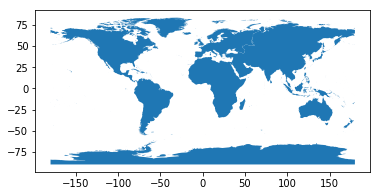

In [88]:
map_df.plot()

Text(0.5, 1.0, 'Hurricane Michael')

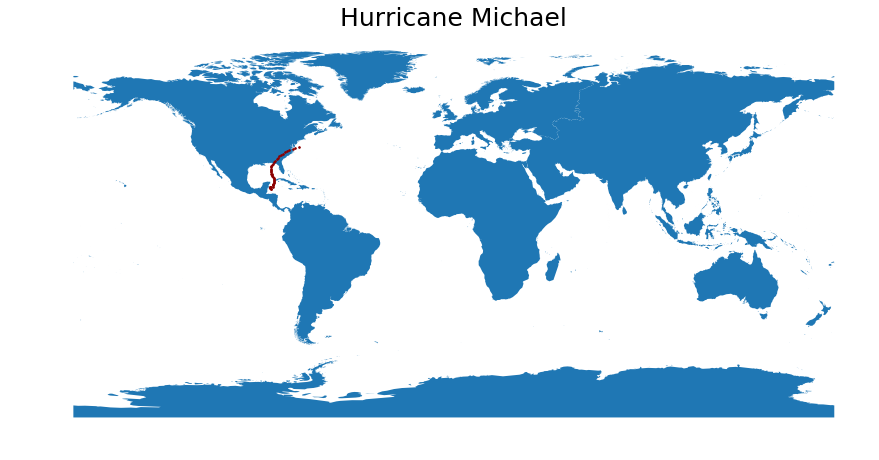

In [90]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
geo_hm.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael", fontsize=25, fontweight=3)